In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('white')

In [3]:
# Importing the dataset
df1 = pd.read_csv('sgemm_product.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 18 columns):
MWG          241600 non-null int64
NWG          241600 non-null int64
KWG          241600 non-null int64
MDIMC        241600 non-null int64
NDIMC        241600 non-null int64
MDIMA        241600 non-null int64
NDIMB        241600 non-null int64
KWI          241600 non-null int64
VWM          241600 non-null int64
VWN          241600 non-null int64
STRM         241600 non-null int64
STRN         241600 non-null int64
SA           241600 non-null int64
SB           241600 non-null int64
Run1 (ms)    241600 non-null float64
Run2 (ms)    241600 non-null float64
Run3 (ms)    241600 non-null float64
Run4 (ms)    241600 non-null float64
dtypes: float64(4), int64(14)
memory usage: 33.2 MB


In [4]:
#checking for NA
df1.isnull().sum()

MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        0
KWI          0
VWM          0
VWN          0
STRM         0
STRN         0
SA           0
SB           0
Run1 (ms)    0
Run2 (ms)    0
Run3 (ms)    0
Run4 (ms)    0
dtype: int64

In [5]:
#Average runtime calculations
df1['average_runtime']=df1[['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']].mean(axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 19 columns):
MWG                241600 non-null int64
NWG                241600 non-null int64
KWG                241600 non-null int64
MDIMC              241600 non-null int64
NDIMC              241600 non-null int64
MDIMA              241600 non-null int64
NDIMB              241600 non-null int64
KWI                241600 non-null int64
VWM                241600 non-null int64
VWN                241600 non-null int64
STRM               241600 non-null int64
STRN               241600 non-null int64
SA                 241600 non-null int64
SB                 241600 non-null int64
Run1 (ms)          241600 non-null float64
Run2 (ms)          241600 non-null float64
Run3 (ms)          241600 non-null float64
Run4 (ms)          241600 non-null float64
average_runtime    241600 non-null float64
dtypes: float64(5), int64(14)
memory usage: 35.0 MB


In [6]:
df1=df1.drop(['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'],axis=1)
df1.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,average_runtime
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625


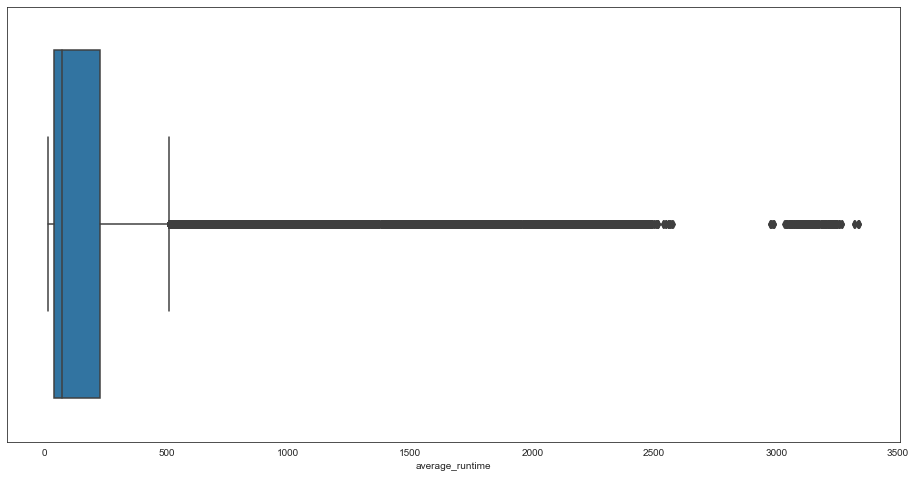

In [7]:
#finding outliers using boxplot
plt.figure(figsize=(16,8))
sns.boxplot(x='average_runtime', data = df1 )

In [8]:
#outlier removal
Q1=df1['average_runtime'].quantile(0.25)
Q3=df1['average_runtime'].quantile(0.75)
IQR = Q3 - Q1
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR

In [9]:
df2 = df1[(df1.average_runtime>LL) & (df1.average_runtime<UL)]
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
MWG,214833.0,75.688037,41.968313,16.0000,32.000,64.00,128.0000,128.0000
NWG,214833.0,75.761619,41.997377,16.0000,32.000,64.00,128.0000,128.0000
KWG,214833.0,25.592567,7.839899,16.0000,16.000,32.00,32.0000,32.0000
MDIMC,214833.0,14.475690,8.111065,8.0000,8.000,16.00,16.0000,32.0000
NDIMC,214833.0,14.470700,8.111264,8.0000,8.000,16.00,16.0000,32.0000
MDIMA,214833.0,17.390550,9.375134,8.0000,8.000,16.00,32.0000,32.0000
NDIMB,214833.0,17.388762,9.374445,8.0000,8.000,16.00,32.0000,32.0000
KWI,214833.0,5.005544,3.000002,2.0000,2.000,8.00,8.0000,8.0000
VWM,214833.0,2.339538,1.858623,1.0000,1.000,2.00,4.0000,8.0000
VWN,214833.0,2.345156,1.862122,1.0000,1.000,2.00,4.0000,8.0000


In [10]:
#converting average_runtime into 1 and 0 form for sv

mean = df2['average_runtime'].mean()
df2.loc[df2['average_runtime'] <= mean, 'average_runtime'] = 0
df2.loc[df2['average_runtime'] > mean, 'average_runtime'] = 1

C:\Users\arush\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [12]:
x1 = df2.iloc[:,1:14].values 

y1 = df2.iloc[:,14].values

In [13]:
#splitting the data into test set and training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.3, random_state = 0)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [14]:
# Part 2 - Now let's make the ANN!




# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X_train, y_train, batch_size = 10, epochs = 200,validation_split=0.3)

Train on 105268 samples, validate on 45115 samples
Epoch 1/200
105268/105268 [==============================] - 22s 213us/step - loss: 0.5281 - accuracy: 0.7475 - val_loss: 0.5190 - val_accuracy: 0.7521
Epoch 2/200
105268/105268 [==============================] - 20s 195us/step - loss: 0.5130 - accuracy: 0.7563 - val_loss: 0.5158 - val_accuracy: 0.7558
Epoch 3/200
105268/105268 [==============================] - 21s 196us/step - loss: 0.5105 - accuracy: 0.7573 - val_loss: 0.5134 - val_accuracy: 0.7563
Epoch 4/200
105268/105268 [==============================] - 20s 192us/step - loss: 0.5077 - accuracy: 0.7579 - val_loss: 0.5083 - val_accuracy: 0.7507
Epoch 5/200
105268/105268 [==============================] - 20s 190us/step - loss: 0.4995 - accuracy: 0.7567 - val_loss: 0.5013 - val_accuracy: 0.7572
Epoch 6/200
105268/105268 [==============================] - 21s 201us/step - loss: 0.4965 - accuracy: 0.7570 - val_loss: 0.5005 - val_accuracy: 0.7509
Epoch 7/200
105268/105268 [==========

105268/105268 [==============================] - 24s 224us/step - loss: 0.3936 - accuracy: 0.7891 - val_loss: 0.4012 - val_accuracy: 0.7878
Epoch 108/200
105268/105268 [==============================] - 24s 225us/step - loss: 0.3935 - accuracy: 0.7890 - val_loss: 0.3973 - val_accuracy: 0.7858
Epoch 109/200
105268/105268 [==============================] - 23s 214us/step - loss: 0.3937 - accuracy: 0.7887 - val_loss: 0.3981 - val_accuracy: 0.7823
Epoch 110/200
105268/105268 [==============================] - 24s 224us/step - loss: 0.3934 - accuracy: 0.7895 - val_loss: 0.3988 - val_accuracy: 0.7865
Epoch 111/200
105268/105268 [==============================] - 24s 226us/step - loss: 0.3935 - accuracy: 0.7887 - val_loss: 0.3986 - val_accuracy: 0.7868
Epoch 112/200
105268/105268 [==============================] - 24s 225us/step - loss: 0.3934 - accuracy: 0.7880 - val_loss: 0.3981 - val_accuracy: 0.7851
Epoch 113/200
105268/105268 [==============================] - 24s 225us/step - loss: 0.39

In [16]:
# Predicting the Test set results
y_pred = classifier.predict_classes(X_test)
#y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accu=accuracy_score(y_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

[[39768  3416]
 [10430 10836]] 

The accuracy is 0.785166795965865


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


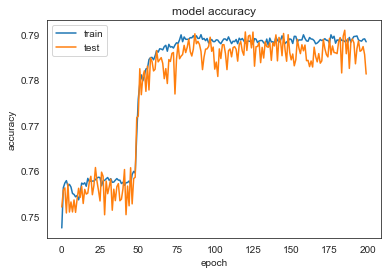

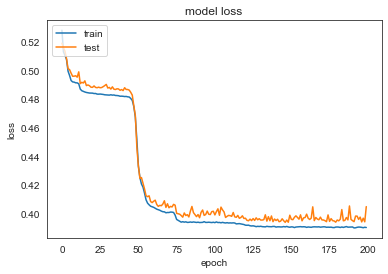

In [17]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [2]:
# Part 2 - Now let's make the ANN!

#100


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,validation_split=0.3)

NameError: name 'Sequential' is not defined

In [1]:
# Predicting the Test set results
y_pred = classifier.predict_classes(X_test)
#y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accu=accuracy_score(y_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

NameError: name 'classifier' is not defined

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Part 2 - Now let's make the ANN!

#400


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X_train, y_train, batch_size = 10, epochs = 400,validation_split=0.3)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict_classes(X_test)
#y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accu=accuracy_score(y_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Experiment 2

In [ ]:
#Experiment 2 (For different layers)
#no of layers=3

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=89, units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the third hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,validation_split=0.3)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict_classes(X_test)
#y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accu=accuracy_score(y_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Initialising the ANN
#no of layers=4
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=26, units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the third hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the fourth hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))


# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,validation_split=0.3)


In [ ]:
# Predicting the Test set results
y_pred = classifier.predict_classes(X_test)
#y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accu=accuracy_score(y_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Initialising the ANN
#number of layers=5
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=26, units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the third hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the fourth hidden layer
classifier.add(Dense(activation="tanh", units=6, kernel_initializer="uniform"))

# Adding the fifth hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))


# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X1_train, y1_train, batch_size = 10, epochs = 100,validation_split=0.3)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict_classes(X_test)
#y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accu=accuracy_score(y_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Initialising the ANN
# no of layers=10
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=26, units=14, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=14, kernel_initializer="uniform"))

# Adding the third hidden layer
classifier.add(Dense(activation="relu", units=14, kernel_initializer="uniform"))

# Adding the fourth hidden layer
classifier.add(Dense(activation="relu", units=14, kernel_initializer="uniform"))

# Adding the fifth hidden layer
classifier.add(Dense(activation="relu", units=14, kernel_initializer="uniform"))

# Adding the sixth hidden layer
classifier.add(Dense(activation="relu", units=14, kernel_initializer="uniform"))
# Adding the seventh hidden layer
classifier.add(Dense(activation="relu", units=14, kernel_initializer="uniform"))
# Adding the eighth hidden layer
classifier.add(Dense(activation="relu", units=14, kernel_initializer="uniform"))
# Adding the ninth hidden layer
classifier.add(Dense(activation="relu", units=14, kernel_initializer="uniform"))
# Adding the tenth hidden layer
classifier.add(Dense(activation="relu", units=14, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,validation_split=0.3)


In [ ]:
# Predicting the Test set results
y_pred = classifier.predict_classes(X_test)
#y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accu=accuracy_score(y_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Experiment 3 Activation function

In [ ]:
# Initialising the ANN
#sigmoid
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="sigmoid", input_dim=89, units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="sigmoid", units=6, kernel_initializer="uniform"))

# Adding the third hidden layer
classifier.add(Dense(activation="sigmoid", units=6, kernel_initializer="uniform"))

# Adding the fourth hidden layer
classifier.add(Dense(activation="sigmoid", units=6, kernel_initializer="uniform"))

# Adding the fifth hidden layer
classifier.add(Dense(activation="sigmoid", units=6, kernel_initializer="uniform"))


# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,validation_split=0.3)


In [ ]:
# Predicting the Test set results
y_pred = classifier.predict_classes(X_test)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accu=accuracy_score(y_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Initialising the ANN
#softmax
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="softmax", input_dim=89, units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="softmax", units=6, kernel_initializer="uniform"))

# Adding the third hidden layer
classifier.add(Dense(activation="softmax", units=6, kernel_initializer="uniform"))

# Adding the fourth hidden layer
classifier.add(Dense(activation="softmax", units=6, kernel_initializer="uniform"))

# Adding the fifth hidden layer
classifier.add(Dense(activation="softmax", units=6, kernel_initializer="uniform"))


# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,validation_split=0.3)


In [ ]:
# Predicting the Test set results
y_pred = classifier.predict_classes(X_test)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accu=accuracy_score(y_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Initialising the ANN
#tanh
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="tanh", input_dim=89, units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="tanh", units=6, kernel_initializer="uniform"))

# Adding the third hidden layer
classifier.add(Dense(activation="tanh", units=6, kernel_initializer="uniform"))

# Adding the fourth hidden layer
classifier.add(Dense(activation="tanh", units=6, kernel_initializer="uniform"))

# Adding the fifth hidden layer
classifier.add(Dense(activation="tanh", units=6, kernel_initializer="uniform"))


# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,validation_split=0.3)


In [ ]:
# Predicting the Test set results
y_pred = classifier.predict_classes(X_test)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accu=accuracy_score(y_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#changing the number of nodes:
#changing the number of nodes to 16.

# Initialising the ANN
#number of layers=5
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=89, units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=16, kernel_initializer="uniform"))

# Adding the third hidden layer
classifier.add(Dense(activation="relu", units=16, kernel_initializer="uniform"))

# Adding the fourth hidden layer
classifier.add(Dense(activation="tanh", units=16, kernel_initializer="uniform"))

# Adding the fifth hidden layer
classifier.add(Dense(activation="relu", units=16, kernel_initializer="uniform"))


# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,validation_split=0.3)



In [ ]:
# Predicting the Test set results
y_pred = classifier.predict_classes(X_test)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accu=accuracy_score(y_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### KNN FOR DATASET 2
##### Experiment 1 with k=5

In [ ]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)

cm

In [ ]:
report=classification_report(y_test,y_pred)
accu_KNN_5=accuracy_score(y_test,y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
mean=accuracies.mean()
std=accuracies.std()
from IPython.display import Markdown, display
bold = "\033[1m"
reset = "\033[0;0m"

print(bold+"KNN with n=5\n\n"+reset)

print("The Confusion Matrix\n",cm,end='\n')
print("The Classification report\n",report,end='\n')
print("The Accuracy score with only 1 Training and Testing Data Set\n",accu_KNN_5*100,end='\n')
#after using cross validation with 5 folds
print("The mean of the accuracy scores with using K-cross validation with 5 folds\n",mean*100,end='\n')
print("The Standard Deviation of the accuracy scores with using K-cross validation with 10 folds\n",std*100,end='\n')

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier, x1, y1,cv=5,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("KNNClassifier")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
# sizes the window for readability and displays the plot
# shows error from 0 to 1.1
plt.ylim(-.1,1.1)
plt.show

#### Experiment 1 (Euclidean distance) with k=3

In [ ]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)

cm

In [ ]:
report=classification_report(y_test,y_pred)
accu_KNN_5=accuracy_score(y_test,y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
mean=accuracies.mean()
std=accuracies.std()
from IPython.display import Markdown, display
bold = "\033[1m"
reset = "\033[0;0m"

print(bold+"KNN with n=3\n\n"+reset)

print("The Confusion Matrix\n",cm,end='\n')
print("The Classification report\n",report,end='\n')
print("The Accuracy score with only 1 Training and Testing Data Set\n",accu_KNN_5*100,end='\n')
#after using cross validation with 5 folds
print("The mean of the accuracy scores with using K-cross validation with 5 folds\n",mean*100,end='\n')
print("The Standard Deviation of the accuracy scores with using K-cross validation with 5 folds\n",std*100,end='\n')


In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier, x1, y1,cv=5,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("KNNClassifier")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
# sizes the window for readability and displays the plot
# shows error from 0 to 1.1
plt.ylim(-.1,1.1)
plt.show

#### Grid search for k with euclidean distance

In [ ]:
#playing around with the KNN with n parameter to get the best n
#performing grid search to find the best value of n in KNN and the most efficient values for Hyperparameters
# Applying Grid Search to find the best model and the best parameters
# Fitting a general classifier to use in Grid Search to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(metric = 'minkowski')
classifier.fit(X_train, y_train)

from sklearn.model_selection import GridSearchCV
parameters = [{'n_neighbors': range(2,40),'p':[2]}] 
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(best_accuracy,end='\n')
print(best_parameters,end='\n')

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i,p=2,metric='minkowski')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='black', linestyle='dashed', marker='o',
         markerfacecolor='grey', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

<h2>KNN with the Best values reported from Grid Serach for Euclidian Distance</h2>

In [ ]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 38, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)

cm

In [ ]:
report=classification_report(y_test,y_pred)
accu_KNN_5=accuracy_score(y_test,y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
mean=accuracies.mean()
std=accuracies.std()
from IPython.display import Markdown, display
bold = "\033[1m"
reset = "\033[0;0m"

print(bold+"KNN with n=38\n\n"+reset)

print("The Confusion Matrix\n",cm,end='\n')
print("The Classification report\n",report,end='\n')
print("The Accuracy score with only 1 Training and Testing Data Set\n",accu_KNN_5*100,end='\n')
#after using cross validation with 10 folds
print("The mean of the accuracy scores with using K-cross validation with 5 folds\n",mean*100,end='\n')
print("The Standard Deviation of the accuracy scores with using K-cross validation with 5 folds\n",std*100,end='\n')


In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier, x1, y1,cv=5,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("KNNClassifier")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
# sizes the window for readability and displays the plot
# shows error from 0 to 1.1
plt.ylim(-.1,1.1)
plt.show

#### knn with manhatten distance

In [ ]:


# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)

cm

In [ ]:
report=classification_report(y_test,y_pred)
accu_KNN_5=accuracy_score(y_test,y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
mean=accuracies.mean()
std=accuracies.std()
from IPython.display import Markdown, display
bold = "\033[1m"
reset = "\033[0;0m"

print(bold+"KNN with n=5\n\n"+reset)

print("The Confusion Matrix\n",cm,end='\n')
print("The Classification report\n",report,end='\n')
print("The Accuracy score with only 1 Training and Testing Data Set\n",accu_KNN_5*100,end='\n')
#after using cross validation with 10 folds
print("The mean of the accuracy scores with using K-cross validation with 5 folds\n",mean*100,end='\n')
print("The Standard Deviation of the accuracy scores with using K-cross validation with 5 folds\n",std*100,end='\n')


In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier, x1, y1,cv=5,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("KNNClassifier")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
# sizes the window for readability and displays the plot
# shows error from 0 to 1.1
plt.ylim(-.1,1.1)
plt.show

In [ ]:
#second experiment with k = 3(manhatten distance)

# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)

cm

In [ ]:
report=classification_report(y_test,y_pred)
accu_KNN_5=accuracy_score(y_test,y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
mean=accuracies.mean()
std=accuracies.std()
from IPython.display import Markdown, display
bold = "\033[1m"
reset = "\033[0;0m"

print(bold+"KNN with n=3\n\n"+reset)

print("The Confusion Matrix\n",cm,end='\n')
print("The Classification report\n",report,end='\n')
print("The Accuracy score with only 1 Training and Testing Data Set\n",accu_KNN_5*100,end='\n')
#after using cross validation with 10 folds
print("The mean of the accuracy scores with using K-cross validation with 10 folds\n",mean*100,end='\n')
print("The Standard Deviation of the accuracy scores with using K-cross validation with 10 folds\n",std*100,end='\n')


In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier, x1, y1,cv=5,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("KNNClassifier")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
# sizes the window for readability and displays the plot
# shows error from 0 to 1.1
plt.ylim(-.1,1.1)
plt.show

### Grid search for k with manhatten distance

In [ ]:
#playing around with the KNN with n parameter to get the best n
#performing grid search to find the best value of n in KNN and the most efficient values for Hyperparameters
# Applying Grid Search to find the best model and the best parameters
# Fitting a general classifier to use in Grid Search to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(metric = 'minkowski')
classifier.fit(X_train, y_train)

from sklearn.model_selection import GridSearchCV
parameters = [{'n_neighbors': range(2,40),'p':[1]}] 
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(best_accuracy,end='\n')
print(best_parameters,end='\n')

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(2, 40):
    knn = KNeighborsClassifier(n_neighbors=i,p=1,metric='minkowski')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(2, 40), error, color='black', linestyle='dashed', marker='o',
         markerfacecolor='grey', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

### knn with best value reported from grid search for manhatten distance

In [ ]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 38, metric = 'minkowski', p = 1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)

cm

In [ ]:
report=classification_report(y_test,y_pred)
accu_KNN_5=accuracy_score(y_test,y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
mean=accuracies.mean()
std=accuracies.std()
from IPython.display import Markdown, display
bold = "\033[1m"
reset = "\033[0;0m"

print(bold+"KNN with n=5\n\n"+reset)

print("The Confusion Matrix\n",cm,end='\n')
print("The Classification report\n",report,end='\n')
print("The Accuracy score with only 1 Training and Testing Data Set\n",accu_KNN_5*100,end='\n')
#after using cross validation with 10 folds
print("The mean of the accuracy scores with using K-cross validation with 10 folds\n",mean*100,end='\n')
print("The Standard Deviation of the accuracy scores with using K-cross validation with 10 folds\n",std*100,end='\n')

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier, x1, y1,cv=5,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("KNNClassifier")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
# sizes the window for readability and displays the plot
# shows error from 0 to 1.1
plt.ylim(-.1,1.1)
plt.show